<a href="https://colab.research.google.com/github/taniasuchi07/Technical-Assessment/blob/main/QMH05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/filtered_diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_1,diag_2,diag_3,change,diabetesMed,readmitted,A1Cresult,insulin,max_glu_serum,medical_specialty
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,250.83,?,?,No,No,NO,NaN,No,NaN,Pediatrics-Endocrinology
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,276,250.01,255,Ch,Yes,>30,NaN,Up,NaN,?
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,648,250,V27,No,Yes,NO,NaN,No,NaN,?
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,8,250.43,403,Ch,Yes,NO,NaN,Up,NaN,?
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,197,157,250,Ch,Yes,NO,NaN,Steady,NaN,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,250.13,291,458,Ch,Yes,>30,>8,Down,NaN,?
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,560,276,787,No,Yes,NO,NaN,Steady,NaN,?
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,38,590,296,Ch,Yes,NO,NaN,Down,NaN,?
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,996,285,998,Ch,Yes,NO,NaN,Up,NaN,Surgery-General


In [ ]:
df.describe()                      # Description of Dataset

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,16.021844,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,8.127566,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,10.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,15.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,20.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,81.000000,16.000000


In [ ]:
df.head()                      #  the head of Dataset

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_1,diag_2,diag_3,change,diabetesMed,readmitted,A1Cresult,insulin,max_glu_serum,medical_specialty
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,250.83,?,?,No,No,NO,NaN,No,NaN,Pediatrics-Endocrinology
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,276,250.01,255,Ch,Yes,>30,NaN,Up,NaN,?
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,648,250,V27,No,Yes,NO,NaN,No,NaN,?
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,8,250.43,403,Ch,Yes,NO,NaN,Up,NaN,?
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,197,157,250,Ch,Yes,NO,NaN,Steady,NaN,?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_diagnoses          101766 non-null  int64 
 12  diag_1                    101766 non-null  object
 13  diag_2                    101766 non-null  object
 14  diag

In [ ]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64


# **Data Preprocessing**

**Cleaning**



In [ ]:
df.isnull().sum()                        # Check null values

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [ ]:
df.isnull().any()                       # Check null values from any rows or any columns

,0
encounter_id,False
patient_nbr,False
race,False
gender,False
age,False
admission_type_id,False
discharge_disposition_id,False
admission_source_id,False
time_in_hospital,False
num_lab_procedures,False


In [ ]:
df.dropna(inplace=True)                 # Remove missing values

In [ ]:
df.isnull().sum()                        # Check null values

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_1,diag_2,diag_3,change,diabetesMed,readmitted,A1Cresult,insulin,max_glu_serum,medical_specialty
162,2521974,80499960,Caucasian,Male,[80-90),6,3,7,5,47,...,332,294,425,No,No,<30,Norm,No,>200,?
192,2595612,89193870,Caucasian,Female,[40-50),6,1,7,2,53,...,250.02,401,?,No,No,>30,>8,No,>300,?
460,4084524,76959585,AfricanAmerican,Female,[70-80),6,1,7,10,72,...,250.02,276,294,Ch,Yes,>30,>8,Up,>300,?
593,4804968,114960726,Caucasian,Female,[50-60),6,1,7,2,61,...,276,780,250.03,No,Yes,NO,>8,Steady,>300,?
696,5319174,87847776,Other,Male,[70-80),6,6,7,11,71,...,820,250.02,E885,No,Yes,NO,>7,No,>200,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,424989572,103832127,Caucasian,Male,[60-70),2,1,1,6,51,...,491,414,401,No,Yes,<30,>8,No,>300,?
100493,426670736,101755908,Caucasian,Female,[40-50),1,1,7,3,78,...,250.13,276,288,No,No,NO,>8,No,>200,?
100578,427875206,90285327,Caucasian,Female,[60-70),1,2,7,4,90,...,428,792,280,No,No,NO,>8,No,>300,?
101029,433822712,104106645,Caucasian,Male,[50-60),1,1,7,7,72,...,250.02,276,276,Ch,Yes,>30,>8,No,>300,?


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data_null_removed.csv")

**Filling Missing values with Mean**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/filtered_diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_1,diag_2,diag_3,change,diabetesMed,readmitted,A1Cresult,insulin,max_glu_serum,medical_specialty
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,250.83,?,?,No,No,NO,NaN,No,NaN,Pediatrics-Endocrinology
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,276,250.01,255,Ch,Yes,>30,NaN,Up,NaN,?
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,648,250,V27,No,Yes,NO,NaN,No,NaN,?
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,8,250.43,403,Ch,Yes,NO,NaN,Up,NaN,?
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,197,157,250,Ch,Yes,NO,NaN,Steady,NaN,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,250.13,291,458,Ch,Yes,>30,>8,Down,NaN,?
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,560,276,787,No,Yes,NO,NaN,Steady,NaN,?
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,38,590,296,Ch,Yes,NO,NaN,Down,NaN,?
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,996,285,998,Ch,Yes,NO,NaN,Up,NaN,Surgery-General


In [ ]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['race_le']= label_encoder.fit_transform(df['race'])
df['gender_le']= label_encoder.fit_transform(df['gender'])
df['age_le']= label_encoder.fit_transform(df['age'])
df['diag_1_le']= label_encoder.fit_transform(df['diag_1'])
df['diag_2_le']= label_encoder.fit_transform(df['diag_2'])
df['diag_3_le']= label_encoder.fit_transform(df['diag_3'])
df['change_le']= label_encoder.fit_transform(df['change'])
df['diabetesMed_le']= label_encoder.fit_transform(df['diabetesMed'])
df['readmitted_le']= label_encoder.fit_transform(df['readmitted'])
df['A1Cresult_le']= label_encoder.fit_transform(df['A1Cresult'])
df['insulin_le']= label_encoder.fit_transform(df['insulin'])
df['max_glu_serum_le']= label_encoder.fit_transform(df['max_glu_serum'])
df['medical_specialty_le']= label_encoder.fit_transform(df['medical_specialty'])

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,124,650,670,1,0,2,3,1,3,38
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,143,79,121,0,1,1,3,3,3,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,454,78,767,1,1,2,3,1,3,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,554,97,248,0,1,2,3,3,3,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,102,148,295,0,1,1,1,0,3,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,381,133,536,1,1,2,3,2,3,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,236,389,159,0,1,2,3,0,3,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,693,142,668,0,1,2,3,3,3,63


In [ ]:
df_1= df.drop(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed', 'readmitted','A1Cresult', 'insulin', 'max_glu_serum', 'medical_specialty'], axis=1)

In [ ]:
df_1

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,2278392,8222157,6,25,1,1,41,1,1,3,...,124,650,670,1,0,2,3,1,3,38
1,149190,55629189,1,1,7,3,59,18,9,3,...,143,79,121,0,1,1,3,3,3,0
2,64410,86047875,1,1,7,2,11,13,6,1,...,454,78,767,1,1,2,3,1,3,0
3,500364,82442376,1,1,7,2,44,16,7,3,...,554,97,248,0,1,2,3,3,3,0
4,16680,42519267,1,1,7,1,51,8,5,3,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,16,9,1,...,102,148,295,0,1,1,1,0,3,0
101762,443847782,74694222,1,4,5,5,33,18,9,1,...,381,133,536,1,1,2,3,2,3,0
101763,443854148,41088789,1,1,7,1,53,9,13,3,...,236,389,159,0,1,2,3,0,3,0
101764,443857166,31693671,2,3,7,10,45,21,9,3,...,693,142,668,0,1,2,3,3,3,63


In [ ]:
df_1['A1Cresult_le'] = df_1['A1Cresult_le'].replace(np.nan, df_1['A1Cresult_le'].mean())
df_1['max_glu_serum_le'] = df_1['max_glu_serum_le'].replace(np.nan, df_1['max_glu_serum_le'].mean())

In [ ]:
df_1.isnull().sum()

,0
encounter_id,0
patient_nbr,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_medications,0
number_diagnoses,0
race_le,0


In [ ]:
df_1

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,2278392,8222157,6,25,1,1,41,1,1,3,...,124,650,670,1,0,2,3,1,3,38
1,149190,55629189,1,1,7,3,59,18,9,3,...,143,79,121,0,1,1,3,3,3,0
2,64410,86047875,1,1,7,2,11,13,6,1,...,454,78,767,1,1,2,3,1,3,0
3,500364,82442376,1,1,7,2,44,16,7,3,...,554,97,248,0,1,2,3,3,3,0
4,16680,42519267,1,1,7,1,51,8,5,3,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,16,9,1,...,102,148,295,0,1,1,1,0,3,0
101762,443847782,74694222,1,4,5,5,33,18,9,1,...,381,133,536,1,1,2,3,2,3,0
101763,443854148,41088789,1,1,7,1,53,9,13,3,...,236,389,159,0,1,2,3,0,3,0
101764,443857166,31693671,2,3,7,10,45,21,9,3,...,693,142,668,0,1,2,3,3,3,63


In [ ]:
df_1.to_csv('/content/drive/MyDrive/Colab Notebooks/Fill_value.csv')

# **Label Encoding**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_null_removed.csv")
df

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_1,diag_2,diag_3,change,diabetesMed,readmitted,A1Cresult,insulin,max_glu_serum,medical_specialty
0,162,2521974,80499960,Caucasian,Male,[80-90),6,3,7,5,...,332,294,425,No,No,<30,Norm,No,>200,?
1,192,2595612,89193870,Caucasian,Female,[40-50),6,1,7,2,...,250.02,401,?,No,No,>30,>8,No,>300,?
2,460,4084524,76959585,AfricanAmerican,Female,[70-80),6,1,7,10,...,250.02,276,294,Ch,Yes,>30,>8,Up,>300,?
3,593,4804968,114960726,Caucasian,Female,[50-60),6,1,7,2,...,276,780,250.03,No,Yes,NO,>8,Steady,>300,?
4,696,5319174,87847776,Other,Male,[70-80),6,6,7,11,...,820,250.02,E885,No,Yes,NO,>7,No,>200,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,100386,424989572,103832127,Caucasian,Male,[60-70),2,1,1,6,...,491,414,401,No,Yes,<30,>8,No,>300,?
294,100493,426670736,101755908,Caucasian,Female,[40-50),1,1,7,3,...,250.13,276,288,No,No,NO,>8,No,>200,?
295,100578,427875206,90285327,Caucasian,Female,[60-70),1,2,7,4,...,428,792,280,No,No,NO,>8,No,>300,?
296,101029,433822712,104106645,Caucasian,Male,[50-60),1,1,7,7,...,250.02,276,276,Ch,Yes,>30,>8,No,>300,?


In [ ]:
df= df.drop(['Unnamed: 0'], axis=1)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_1,diag_2,diag_3,change,diabetesMed,readmitted,A1Cresult,insulin,max_glu_serum,medical_specialty
0,2521974,80499960,Caucasian,Male,[80-90),6,3,7,5,47,...,332,294,425,No,No,<30,Norm,No,>200,?
1,2595612,89193870,Caucasian,Female,[40-50),6,1,7,2,53,...,250.02,401,?,No,No,>30,>8,No,>300,?
2,4084524,76959585,AfricanAmerican,Female,[70-80),6,1,7,10,72,...,250.02,276,294,Ch,Yes,>30,>8,Up,>300,?
3,4804968,114960726,Caucasian,Female,[50-60),6,1,7,2,61,...,276,780,250.03,No,Yes,NO,>8,Steady,>300,?
4,5319174,87847776,Other,Male,[70-80),6,6,7,11,71,...,820,250.02,E885,No,Yes,NO,>7,No,>200,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,424989572,103832127,Caucasian,Male,[60-70),2,1,1,6,51,...,491,414,401,No,Yes,<30,>8,No,>300,?
294,426670736,101755908,Caucasian,Female,[40-50),1,1,7,3,78,...,250.13,276,288,No,No,NO,>8,No,>200,?
295,427875206,90285327,Caucasian,Female,[60-70),1,2,7,4,90,...,428,792,280,No,No,NO,>8,No,>300,?
296,433822712,104106645,Caucasian,Male,[50-60),1,1,7,7,72,...,250.02,276,276,Ch,Yes,>30,>8,No,>300,?


In [ ]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['race_le']= label_encoder.fit_transform(df['race'])
df['gender_le']= label_encoder.fit_transform(df['gender'])
df['age_le']= label_encoder.fit_transform(df['age'])
df['diag_1_le']= label_encoder.fit_transform(df['diag_1'])
df['diag_2_le']= label_encoder.fit_transform(df['diag_2'])
df['diag_3_le']= label_encoder.fit_transform(df['diag_3'])
df['change_le']= label_encoder.fit_transform(df['change'])
df['diabetesMed_le']= label_encoder.fit_transform(df['diabetesMed'])
df['readmitted_le']= label_encoder.fit_transform(df['readmitted'])
df['A1Cresult_le']= label_encoder.fit_transform(df['A1Cresult'])
df['insulin_le']= label_encoder.fit_transform(df['insulin'])
df['max_glu_serum_le']= label_encoder.fit_transform(df['max_glu_serum'])
df['medical_specialty_le']= label_encoder.fit_transform(df['medical_specialty'])

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,2521974,80499960,Caucasian,Male,[80-90),6,3,7,5,47,...,23,27,45,1,0,0,2,1,0,0
1,2595612,89193870,Caucasian,Female,[40-50),6,1,7,2,53,...,4,41,97,1,0,1,1,1,1,0
2,4084524,76959585,AfricanAmerican,Female,[70-80),6,1,7,10,72,...,4,22,27,0,1,1,1,3,1,0
3,4804968,114960726,Caucasian,Female,[50-60),6,1,7,2,61,...,18,88,8,1,1,2,1,2,1,0
4,5319174,87847776,Other,Male,[70-80),6,6,7,11,71,...,86,8,100,1,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,424989572,103832127,Caucasian,Male,[60-70),2,1,1,6,51,...,47,48,37,1,1,0,1,1,1,0
294,426670736,101755908,Caucasian,Female,[40-50),1,1,7,3,78,...,9,22,25,1,0,2,1,1,0,0
295,427875206,90285327,Caucasian,Female,[60-70),1,2,7,4,90,...,35,95,22,1,0,2,1,1,1,0
296,433822712,104106645,Caucasian,Male,[50-60),1,1,7,7,72,...,4,22,20,0,1,1,1,1,1,0


In [ ]:
df['readmitted_le'].unique()

array([0, 1, 2])

In [ ]:
df['race_le'].unique()

array([3, 1, 5, 4, 0, 2])

In [ ]:
df['gender_le'].unique()

array([1, 0])

In [ ]:
df= df.drop(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed', 'readmitted','A1Cresult', 'insulin', 'max_glu_serum', 'medical_specialty'], axis=1)

In [ ]:
df

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,2521974,80499960,6,3,7,5,47,6,5,3,...,23,27,45,1,0,0,2,1,0,0
1,2595612,89193870,6,1,7,2,53,4,2,3,...,4,41,97,1,0,1,1,1,1,0
2,4084524,76959585,6,1,7,10,72,19,5,1,...,4,22,27,0,1,1,1,3,1,0
3,4804968,114960726,6,1,7,2,61,5,5,3,...,18,88,8,1,1,2,1,2,1,0
4,5319174,87847776,6,6,7,11,71,20,5,5,...,86,8,100,1,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,424989572,103832127,2,1,1,6,51,20,9,3,...,47,48,37,1,1,0,1,1,1,0
294,426670736,101755908,1,1,7,3,78,8,9,3,...,9,22,25,1,0,2,1,1,0,0
295,427875206,90285327,1,2,7,4,90,25,9,3,...,35,95,22,1,0,2,1,1,1,0
296,433822712,104106645,1,1,7,7,72,16,9,3,...,4,22,20,0,1,1,1,1,1,0


In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
count,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.578504e+08,7.353052e+07,5.053691,2.174497,6.503356,5.416107,64.268456,14.510067,5.912752,2.791946,...,42.214765,44.758389,41.540268,0.701342,0.593960,1.291946,0.983221,1.208054,1.090604,0.493289
std,9.552628e+07,3.164800e+07,1.937701,2.134317,1.645826,3.065175,14.404045,7.362767,1.561027,1.074812,...,24.157470,29.286269,29.019326,0.458439,0.491918,0.670697,0.638063,0.643802,0.748857,0.520575
min,2.521974e+06,8.227980e+05,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.441380e+07,5.773348e+07,6.000000,1.000000,7.000000,3.000000,54.000000,9.000000,5.000000,3.000000,...,26.000000,19.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.459230e+08,8.381063e+07,6.000000,1.000000,7.000000,5.000000,63.500000,13.500000,6.000000,3.000000,...,38.000000,45.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.199490e+08,9.531259e+07,6.000000,3.000000,7.000000,7.000000,74.000000,19.000000,6.000000,3.000000,...,63.750000,66.000000,63.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,4.349005e+08,1.747746e+08,6.000000,13.000000,7.000000,14.000000,106.000000,35.000000,9.000000,5.000000,...,91.000000,104.000000,104.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000


In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,gender_le,age_le,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
count,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.578504e+08,7.353052e+07,5.053691,2.174497,6.503356,5.416107,64.268456,14.510067,5.912752,2.791946,0.419463,4.677852,42.214765,44.758389,41.540268,0.701342,0.593960,1.291946,0.983221,1.208054,1.090604,0.493289
std,9.552628e+07,3.164800e+07,1.937701,2.134317,1.645826,3.065175,14.404045,7.362767,1.561027,1.074812,0.494301,1.613364,24.157470,29.286269,29.019326,0.458439,0.491918,0.670697,0.638063,0.643802,0.748857,0.520575
min,2.521974e+06,8.227980e+05,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.441380e+07,5.773348e+07,6.000000,1.000000,7.000000,3.000000,54.000000,9.000000,5.000000,3.000000,0.000000,4.000000,26.000000,19.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.459230e+08,8.381063e+07,6.000000,1.000000,7.000000,5.000000,63.500000,13.500000,6.000000,3.000000,0.000000,5.000000,38.000000,45.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.199490e+08,9.531259e+07,6.000000,3.000000,7.000000,7.000000,74.000000,19.000000,6.000000,3.000000,1.000000,6.000000,63.750000,66.000000,63.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,4.349005e+08,1.747746e+08,6.000000,13.000000,7.000000,14.000000,106.000000,35.000000,9.000000,5.000000,1.000000,7.000000,91.000000,104.000000,104.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/LEncoder.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEncoder.csv")
df.dtypes

,0
Unnamed: 0,int64
encounter_id,int64
patient_nbr,int64
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64
num_medications,int64
number_diagnoses,int64


# **Outlier**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fill_value.csv")

from sklearn.cluster import DBSCAN
from collections import Counter

model = DBSCAN(eps=2, min_samples=1).fit(df)
outliers_df = pd.DataFrame(df)
print(Counter(model.labels_))
outlier = outliers_df[model.labels_==-1]

outlier.to_csv("/content/drive/MyDrive/Colab Notebooks/Outlier.csv")

remain = outliers_df[model.labels_!=-1]
remain.to_csv("/content/drive/MyDrive/Colab Notebooks/Update.csv")

Counter({np.int64(-1): 53953, np.int64(0): 1, np.int64(1): 1, np.int64(2): 1, np.int64(3): 1, np.int64(4): 1, np.int64(5): 1, np.int64(6): 1, np.int64(7): 1, np.int64(8): 1, np.int64(9): 1, np.int64(10): 1, np.int64(11): 1, np.int64(12): 1, np.int64(13): 1, np.int64(14): 1, np.int64(15): 1, np.int64(16): 1, np.int64(17): 1, np.int64(18): 1, np.int64(19): 1, np.int64(20): 1, np.int64(21): 1, np.int64(22): 1, np.int64(23): 1, np.int64(24): 1, np.int64(25): 1, np.int64(26): 1, np.int64(27): 1, np.int64(28): 1, np.int64(29): 1, np.int64(30): 1, np.int64(31): 1, np.int64(32): 1, np.int64(33): 1, np.int64(34): 1, np.int64(35): 1, np.int64(36): 1, np.int64(37): 1, np.int64(38): 1, np.int64(39): 1, np.int64(40): 1, np.int64(41): 1, np.int64(42): 1, np.int64(43): 1, np.int64(44): 1, np.int64(45): 1, np.int64(46): 1, np.int64(47): 1, np.int64(48): 1, np.int64(49): 1, np.int64(50): 1, np.int64(51): 1, np.int64(52): 1, np.int64(53): 1, np.int64(54): 1, np.int64(55): 1, np.int64(56): 1, np.int64(57

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Update.csv")
df

,Unnamed: 0.1,Unnamed: 0,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,0,0,2278392,8222157,6,25,1,1,41,1,...,124,650,670,1,0,2,3,1,3,38
1,1,1,149190,55629189,1,1,7,3,59,18,...,143,79,121,0,1,1,3,3,3,0
2,2,2,64410,86047875,1,1,7,2,11,13,...,454,78,767,1,1,2,3,1,3,0
3,3,3,500364,82442376,1,1,7,2,44,16,...,554,97,248,0,1,2,3,3,3,0
4,4,4,16680,42519267,1,1,7,1,51,8,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47808,101760,101760,443847176,50375628,1,1,7,6,45,25,...,202,271,254,0,1,1,3,0,3,0
47809,101761,101761,443847548,100162476,1,3,7,3,51,16,...,102,148,295,0,1,1,1,0,3,0
47810,101762,101762,443847782,74694222,1,4,5,5,33,18,...,381,133,536,1,1,2,3,2,3,0
47811,101763,101763,443854148,41088789,1,1,7,1,53,9,...,236,389,159,0,1,2,3,0,3,0


In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/DBSCAN.csv")

In [ ]:
df

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,2278392,8222157,6,25,1,1,41,1,1,3,...,124,650,670,1,0,2,3,1,3,38
1,149190,55629189,1,1,7,3,59,18,9,3,...,143,79,121,0,1,1,3,3,3,0
2,64410,86047875,1,1,7,2,11,13,6,1,...,454,78,767,1,1,2,3,1,3,0
3,500364,82442376,1,1,7,2,44,16,7,3,...,554,97,248,0,1,2,3,3,3,0
4,16680,42519267,1,1,7,1,51,8,5,3,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47808,443847176,50375628,1,1,7,6,45,25,9,1,...,202,271,254,0,1,1,3,0,3,0
47809,443847548,100162476,1,3,7,3,51,16,9,1,...,102,148,295,0,1,1,1,0,3,0
47810,443847782,74694222,1,4,5,5,33,18,9,1,...,381,133,536,1,1,2,3,2,3,0
47811,443854148,41088789,1,1,7,1,53,9,13,3,...,236,389,159,0,1,2,3,0,3,0


# **Data Analysis**

**Correlation**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DBSCAN.csv')
df

,Unnamed: 0,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,0,2278392,8222157,6,25,1,1,41,1,1,...,124,650,670,1,0,2,3,1,3,38
1,1,149190,55629189,1,1,7,3,59,18,9,...,143,79,121,0,1,1,3,3,3,0
2,2,64410,86047875,1,1,7,2,11,13,6,...,454,78,767,1,1,2,3,1,3,0
3,3,500364,82442376,1,1,7,2,44,16,7,...,554,97,248,0,1,2,3,3,3,0
4,4,16680,42519267,1,1,7,1,51,8,5,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47808,47808,443847176,50375628,1,1,7,6,45,25,9,...,202,271,254,0,1,1,3,0,3,0
47809,47809,443847548,100162476,1,3,7,3,51,16,9,...,102,148,295,0,1,1,1,0,3,0
47810,47810,443847782,74694222,1,4,5,5,33,18,9,...,381,133,536,1,1,2,3,2,3,0
47811,47811,443854148,41088789,1,1,7,1,53,9,13,...,236,389,159,0,1,2,3,0,3,0


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Train_test_splitting of the dataset to avoid overfitting

X = df.drop(columns = 'readmitted_le')

# Getting Predicting Value
y = df['readmitted_le']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
df.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
encounter_id,1.000000,0.694704,-0.190353,-0.202055,-0.126590,-0.075176,-0.033275,0.098978,0.322427,0.100990,...,0.018783,0.099165,0.032751,-0.131908,0.070811,0.016895,0.013267,0.068001,0.164760,-0.192599
patient_nbr,0.694704,1.000000,-0.054450,-0.183723,-0.032179,-0.047249,-0.007706,0.074212,0.257923,0.140388,...,0.022908,0.074878,0.025568,-0.115799,0.059678,-0.015978,0.013747,0.041781,0.084184,-0.162954
admission_type_id,-0.190353,-0.054450,1.000000,0.165721,0.188104,-0.010436,-0.197730,0.087876,-0.131123,0.082756,...,0.032438,-0.013287,-0.006253,-0.015823,0.009938,0.000823,0.087891,-0.019407,-0.419578,0.189277
discharge_disposition_id,-0.202055,-0.183723,0.165721,1.000000,0.012157,0.134555,-0.002684,0.069564,-0.018094,-0.008137,...,0.029171,0.007467,0.005350,0.040008,-0.058777,-0.017666,0.022633,-0.047672,-0.057021,-0.038638
admission_source_id,-0.126590,-0.032179,0.188104,0.012157,1.000000,-0.021836,-0.035165,-0.073205,0.042104,0.030169,...,-0.017561,-0.029965,-0.012179,-0.017037,0.018265,-0.054243,0.033530,-0.006983,-0.523962,-0.107209
time_in_hospital,-0.075176,-0.047249,-0.010436,0.134555,-0.021836,1.000000,0.358424,0.472701,0.211596,-0.016269,...,-0.029122,0.064763,0.025043,-0.106236,0.055291,-0.061161,-0.072821,0.039341,-0.003089,0.018275
num_lab_procedures,-0.033275,-0.007706,-0.197730,-0.002684,-0.035165,0.358424,1.000000,0.259444,0.156240,-0.049121,...,-0.077249,0.009569,-0.007054,-0.065792,0.031405,-0.043732,-0.236522,0.046969,0.210051,-0.050589
num_medications,0.098978,0.074212,0.087876,0.069564,-0.073205,0.472701,0.259444,1.000000,0.278477,0.056882,...,0.010972,0.058896,0.000668,-0.248067,0.185268,-0.060034,-0.017709,0.079842,0.002665,-0.033509
number_diagnoses,0.322427,0.257923,-0.131123,-0.018094,0.042104,0.211596,0.156240,0.278477,1.000000,0.073260,...,0.053138,0.135389,0.020877,-0.075812,0.036143,-0.097473,0.024629,0.042981,0.048686,-0.170388
race_le,0.100990,0.140388,0.082756,-0.008137,0.030169,-0.016269,-0.049121,0.056882,0.073260,1.000000,...,0.030974,0.022571,0.005116,-0.020824,0.000183,0.002746,0.036419,-0.020770,-0.061023,-0.005868


In [ ]:
corr_matrix= df.corr()

In [ ]:
corr_matrix['readmitted_le']

,readmitted_le
encounter_id,0.016895
patient_nbr,-0.015978
admission_type_id,0.000823
discharge_disposition_id,-0.017666
admission_source_id,-0.054243
time_in_hospital,-0.061161
num_lab_procedures,-0.043732
num_medications,-0.060034
number_diagnoses,-0.097473
race_le,0.002746


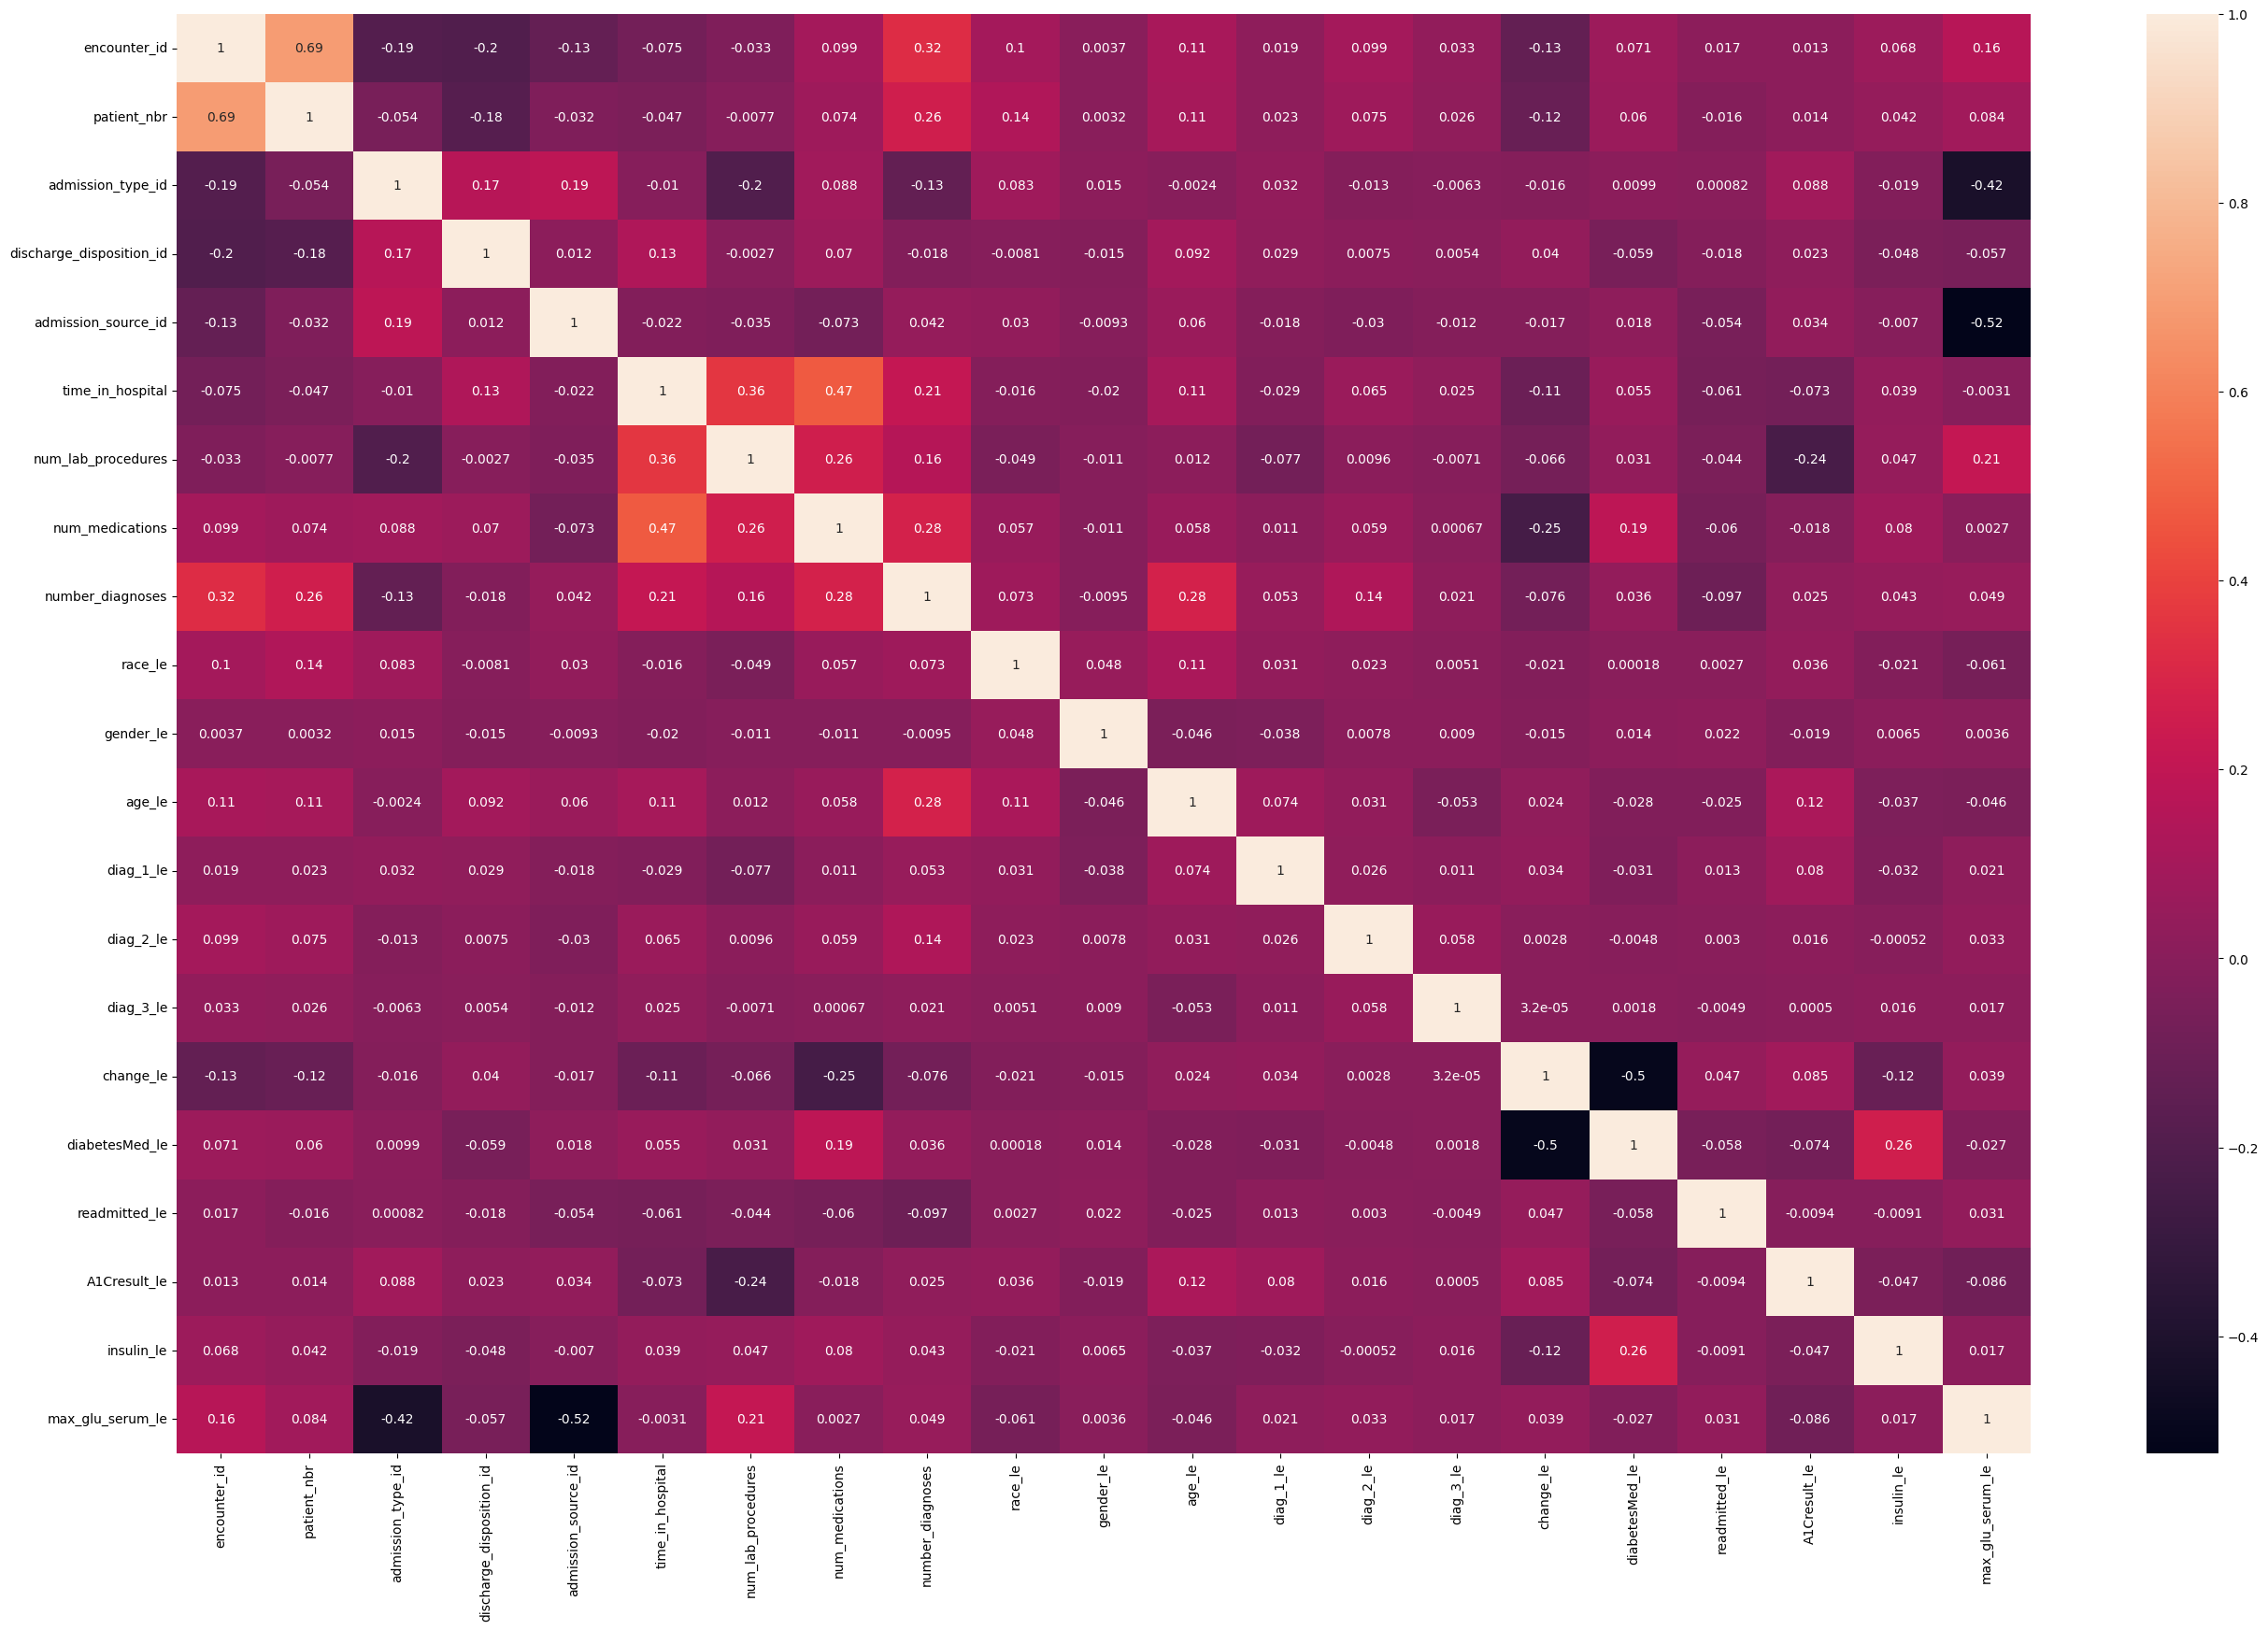

In [ ]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(32,20))
sns.heatmap(df[top_features].corr(),annot=True)
plt.show()

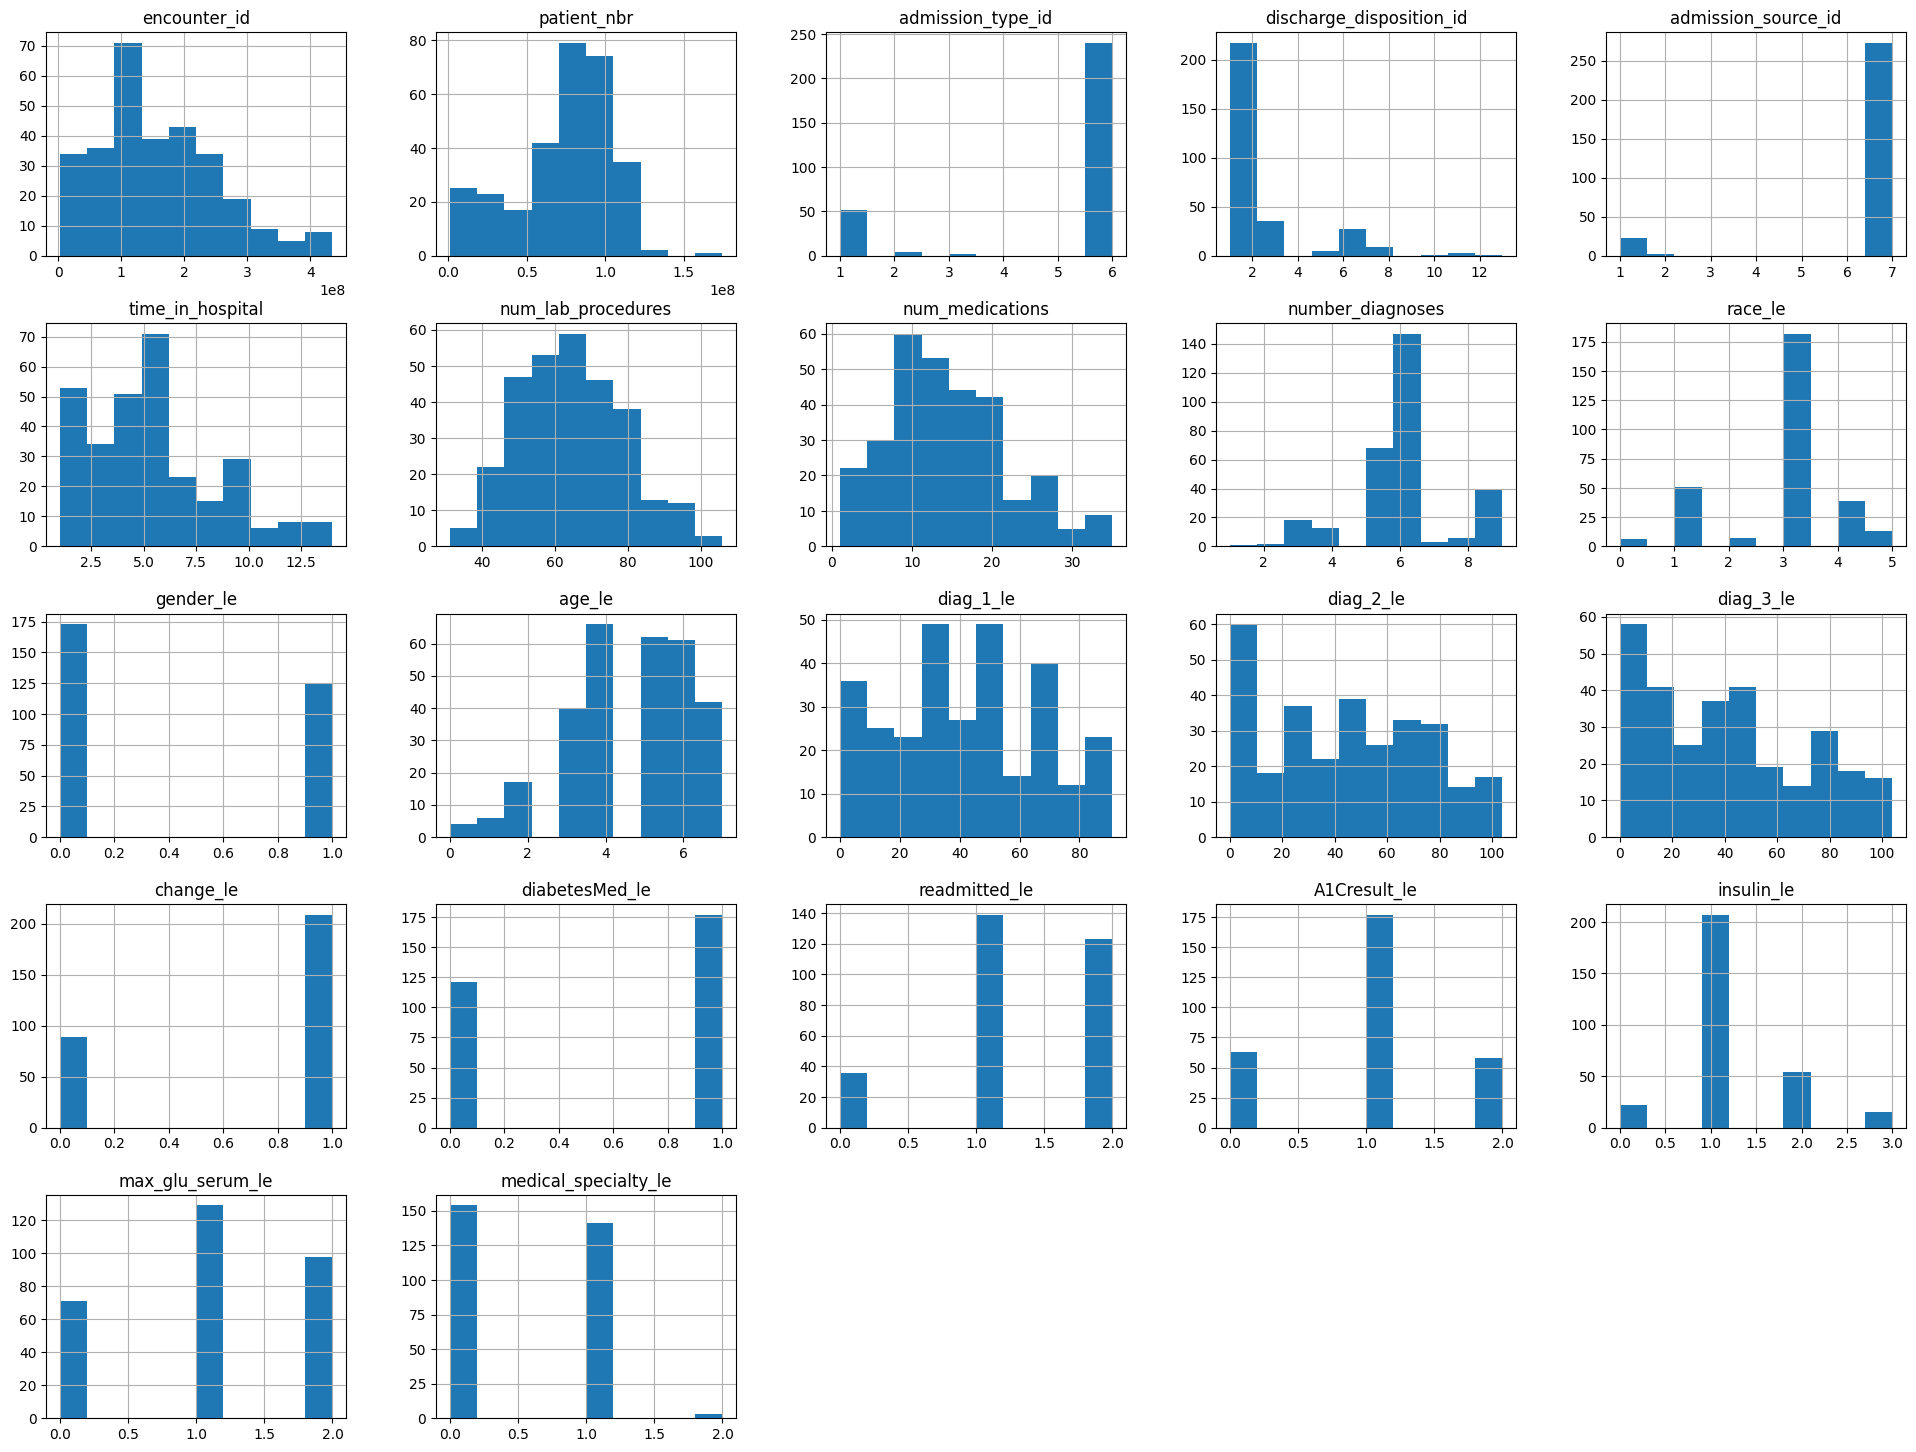

In [ ]:
df.hist(figsize=(24,18))
plt.grid(False)
plt.show()

In [ ]:
y.value_counts()

,count
readmitted_le,
2,27048
1,15366
0,5399


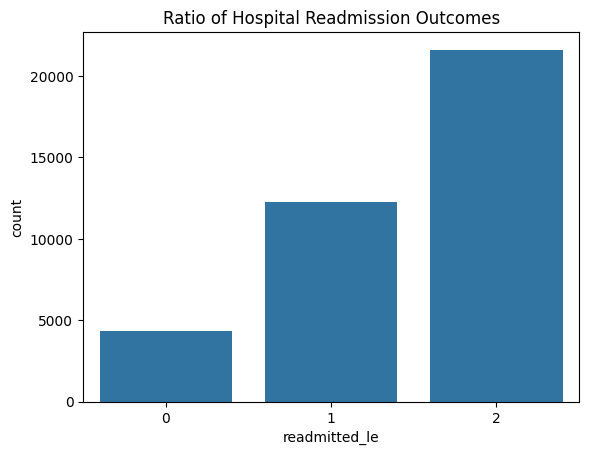

In [ ]:
sns.countplot(x=y_train, data=X_train)

plt.title("Ratio of Hospital Readmission Outcomes")
plt.show()

**Information Gain**

In [ ]:
# Information Gain
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DBSCAN.csv')
df

,Unnamed: 0,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,0,2278392,8222157,6,25,1,1,41,1,1,...,124,650,670,1,0,2,3,1,3,38
1,1,149190,55629189,1,1,7,3,59,18,9,...,143,79,121,0,1,1,3,3,3,0
2,2,64410,86047875,1,1,7,2,11,13,6,...,454,78,767,1,1,2,3,1,3,0
3,3,500364,82442376,1,1,7,2,44,16,7,...,554,97,248,0,1,2,3,3,3,0
4,4,16680,42519267,1,1,7,1,51,8,5,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47808,47808,443847176,50375628,1,1,7,6,45,25,9,...,202,271,254,0,1,1,3,0,3,0
47809,47809,443847548,100162476,1,3,7,3,51,16,9,...,102,148,295,0,1,1,1,0,3,0
47810,47810,443847782,74694222,1,4,5,5,33,18,9,...,381,133,536,1,1,2,3,2,3,0
47811,47811,443854148,41088789,1,1,7,1,53,9,13,...,236,389,159,0,1,2,3,0,3,0


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
X = df.drop(['readmitted_le'], axis=1)
y = df['readmitted_le']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.08282565 0.08298494 0.0287541  0.04758484 0.02606045 0.06590885
 0.07475711 0.07543561 0.04905836 0.03350556 0.02413138 0.06234862
 0.07460289 0.07405285 0.07335551 0.0116446  0.00546774 0.02574961
 0.02624054 0.00682097 0.04870982]


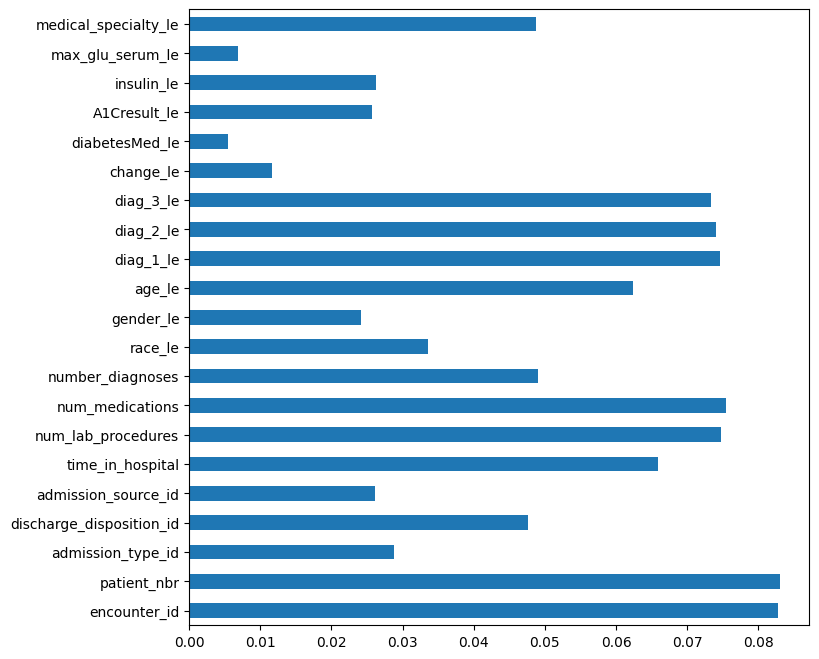

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.plot.barh(figsize=(8,8))
plt.show()

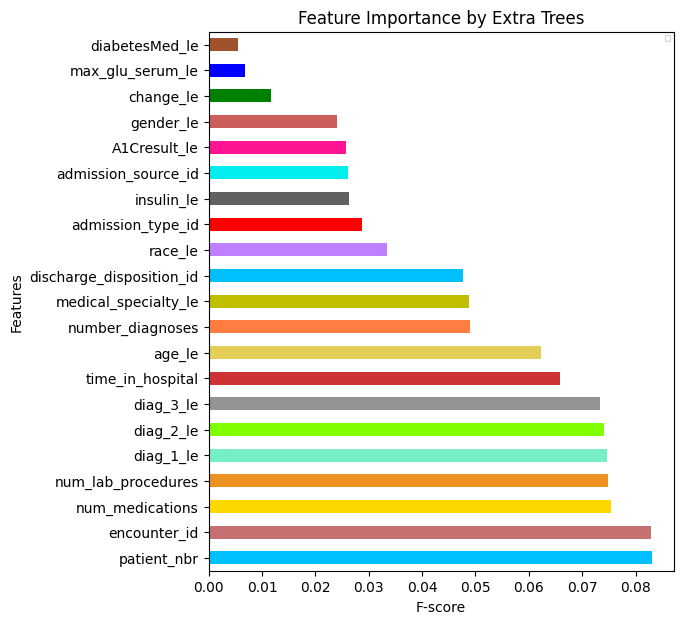

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(30).plot.barh(figsize=(6,7), color=['#00BFFF', '#C67171', '#FFD700', '#ED9121', '#76EEC6', '#7FFF00', '#949494', '#CD3333', '#E3CF57', '#FF7D40', 'y', '#00BFFF', '#bf80ff', 'red', '#616161', '#00EEEE', '#FF1493', '#CD5C5C','green', 'blue', '#A0522D', '#388E8E', '#8E8E38', '#AAAAAA', '#D2B48C'])

plt.legend(bbox_to_anchor=(1,1), fontsize=5)
plt.ylabel('Features')
plt.xlabel('F-score')
plt.title('Feature Importance by Extra Trees')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DBSCAN.csv")

data = df.drop(df.columns.difference(['insulin_le', 'diag_2_le', 'change_le', 'diabetesMed_le', 'time_in_hospital', 'race_le', 'age_le', 'diag_1_le', 'num_medications', 'encounter_id', 'medical_specialty_le', 'discharge_disposition_id', 'gender_le', 'max_glu_serum_le', 'patient_nbr', 'A1Cresult_le','number_diagnoses','admission_source_id','admission_type_id', 'diag_3_le','num_lab_procedures','readmitted_le']) , axis=1)

data.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset_1.csv')

# **TRAINING AND TESTING DATA**

In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DBSCAN.csv')
df

,Unnamed: 0,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,...,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,readmitted_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
0,0,2278392,8222157,6,25,1,1,41,1,1,...,124,650,670,1,0,2,3,1,3,38
1,1,149190,55629189,1,1,7,3,59,18,9,...,143,79,121,0,1,1,3,3,3,0
2,2,64410,86047875,1,1,7,2,11,13,6,...,454,78,767,1,1,2,3,1,3,0
3,3,500364,82442376,1,1,7,2,44,16,7,...,554,97,248,0,1,2,3,3,3,0
4,4,16680,42519267,1,1,7,1,51,8,5,...,54,24,86,0,1,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47808,47808,443847176,50375628,1,1,7,6,45,25,9,...,202,271,254,0,1,1,3,0,3,0
47809,47809,443847548,100162476,1,3,7,3,51,16,9,...,102,148,295,0,1,1,1,0,3,0
47810,47810,443847782,74694222,1,4,5,5,33,18,9,...,381,133,536,1,1,2,3,2,3,0
47811,47811,443854148,41088789,1,1,7,1,53,9,13,...,236,389,159,0,1,2,3,0,3,0


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Train_test_splitting of the dataset

X = df.drop(['readmitted_le'], axis=1)


# Getting Predicting Value
y = df['readmitted_le']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,age_le,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
5711,30984150,89179398,1,1,7,14,66,20,8,3,...,7,694,318,371,0,1,3,0,3,0
41220,327315608,186723347,1,6,7,10,73,42,9,3,...,7,263,260,253,0,1,3,3,3,0
20508,78988506,20991555,2,1,4,2,32,18,5,3,...,5,263,78,135,0,1,3,2,3,4
23117,86931216,25345314,5,6,17,5,18,14,9,3,...,7,276,260,258,0,1,3,2,2,0
16965,67686276,23644458,5,3,17,3,20,22,9,3,...,7,276,260,264,0,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,81622254,399537,1,6,7,12,38,19,9,1,...,8,121,261,248,1,1,3,2,3,0
45891,407944862,87568263,1,6,7,1,37,9,9,3,...,7,143,21,51,1,0,3,1,3,0
42613,348481586,97784253,2,1,1,1,29,7,7,5,...,6,290,464,256,0,1,3,3,3,4
43567,364397948,98590968,1,1,7,2,4,10,9,4,...,5,283,513,246,0,1,3,2,3,0


In [ ]:
X_test

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,race_le,...,age_le,diag_1_le,diag_2_le,diag_3_le,change_le,diabetesMed_le,A1Cresult_le,insulin_le,max_glu_serum_le,medical_specialty_le
42764,350742230,44488908,1,3,7,9,70,18,9,3,...,7,405,310,407,0,1,3,2,3,0
28166,206282334,111232548,3,3,1,4,77,28,9,3,...,8,510,318,340,0,1,3,0,3,21
44468,383121236,28532295,2,1,7,4,48,16,8,5,...,5,276,310,265,0,1,3,3,3,9
39604,303646112,55205316,6,3,7,5,71,14,6,3,...,8,236,645,139,1,1,3,2,2,19
31488,247795398,93319488,1,1,7,2,69,14,9,3,...,8,276,386,264,0,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,20965008,2341521,2,1,1,10,46,22,9,1,...,7,26,133,394,1,1,3,1,3,20
31819,251017818,43914834,1,1,7,4,48,24,9,3,...,6,304,444,378,0,1,3,2,3,0
46339,415573964,122582129,1,3,7,4,63,16,9,3,...,7,276,444,139,1,1,3,2,3,0
23067,86723862,1268136,3,2,4,10,56,22,9,3,...,6,709,103,668,0,1,3,2,3,0


In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

38250
9563
38250
9563


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

In [ ]:
# Fitting SMOTE to the train
from collections import Counter
print('Before sampling class distributin:', Counter(y))
print('After sampling class distributin:', Counter(y_resampled))

Before sampling class distributin: Counter({2: 27048, 1: 15366, 0: 5399})
After sampling class distributin: Counter({2: 27048, 1: 27048, 0: 27048})


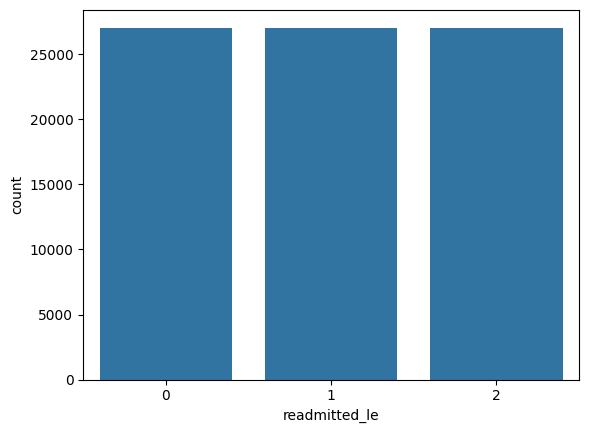

In [ ]:
sns.countplot(x=y_resampled, data=X_resampled)
plt.show()

# **Classification**

# **1. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred_rf))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_rf))
print("R2 score is:\n",r2_score(y_test,y_pred_rf))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      3149
           1       0.82      0.80      0.81      3261
           2       0.84      0.85      0.85      3153

    accuracy                           0.83      9563
   macro avg       0.83      0.83      0.83      9563
weighted avg       0.83      0.83      0.83      9563

Confusion Matrix:
 [[2687  294  168]
 [ 316 2596  349]
 [ 177  284 2692]]
Training Score:
 100.0
Mean Squared Error:
 0.2742863118268326
R2 score is:
 0.5837828155539084


In [ ]:
print(accuracy_score(y_test,y_pred_rf)*100)

83.39433232249294


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X,y)

LogisticRegression()

In [ ]:
y_pred_lr=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_lr))
print("R2 score is:\n",r2_score(y_test,y_pred_lr))

Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1048
           1       0.34      0.00      0.01      3090
           2       0.57      1.00      0.72      5425

    accuracy                           0.57      9563
   macro avg       0.30      0.33      0.24      9563
weighted avg       0.43      0.57      0.41      9563

Confusion Matrix:
 [[   0    6 1042]
 [   0   11 3079]
 [   0   15 5410]]
Training Score:
 56.46535947712419
Mean Squared Error:
 0.7600125483634843
R2 score is:
 -0.6260816406457452


In [ ]:
print(accuracy_score(y_test,y_pred_lr)*100)

56.68723204015477


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_kn=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred_kn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_kn))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_kn))
print("R2 score is:\n",r2_score(y_test,y_pred_kn))

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68      1048
           1       0.63      0.88      0.73      3090
           2       1.00      0.59      0.74      5425

    accuracy                           0.73      9563
   macro avg       0.71      0.82      0.72      9563
weighted avg       0.83      0.73      0.73      9563

Confusion Matrix:
 [[1048    0    0]
 [ 371 2719    0]
 [ 609 1625 3191]]
Training Score:
 73.22352941176472
Mean Squared Error:
 0.46345289135208617
R2 score is:
 0.008421322049815272


In [ ]:
print(accuracy_score(y_test,y_pred_kn)*100)


72.75959426958067


# **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X,y)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc=gbc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred_gbc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gbc))
print("Training Score:\n",gbc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_gbc))
print("R2 score is:\n",r2_score(y_test,y_pred_gbc))

Classification Report is:
               precision    recall  f1-score   support

           0       0.70      0.01      0.02      1543
           1       0.53      0.26      0.35      4602
           2       0.62      0.91      0.74      8199

    accuracy                           0.60     14344
   macro avg       0.62      0.39      0.37     14344
weighted avg       0.60      0.60      0.53     14344

Confusion Matrix:
 [[  19  316 1208]
 [   3 1180 3419]
 [   5  722 7472]]
Training Score:
 59.789656099674325
Mean Squared Error:
 0.649191299498048
R2 score is:
 -0.39957722018499475


In [ ]:
print(accuracy_score(y_test,y_pred_gbc)*100)

60.450362520914666


# **DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y_pred_dt=dtree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred_dt))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))
print("Training Score:\n",dtree.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_dt))
print("R2 score is:\n",r2_score(y_test,y_pred_dt))

Classification Report is:
               precision    recall  f1-score   support

           0       0.53      0.01      0.02      1543
           1       0.45      0.31      0.36      4602
           2       0.61      0.84      0.71      8199

    accuracy                           0.58     14344
   macro avg       0.53      0.38      0.37     14344
weighted avg       0.55      0.58      0.52     14344

Confusion Matrix:
 [[  19  388 1136]
 [   2 1405 3195]
 [  15 1328 6856]]
Training Score:
 57.871463144999844
Mean Squared Error:
 0.6634829894032348
R2 score is:
 -0.43038835958984056


In [ ]:
print(accuracy_score(y_test,y_pred_dt)*100)

57.7244841048522


# **Bar Graph**

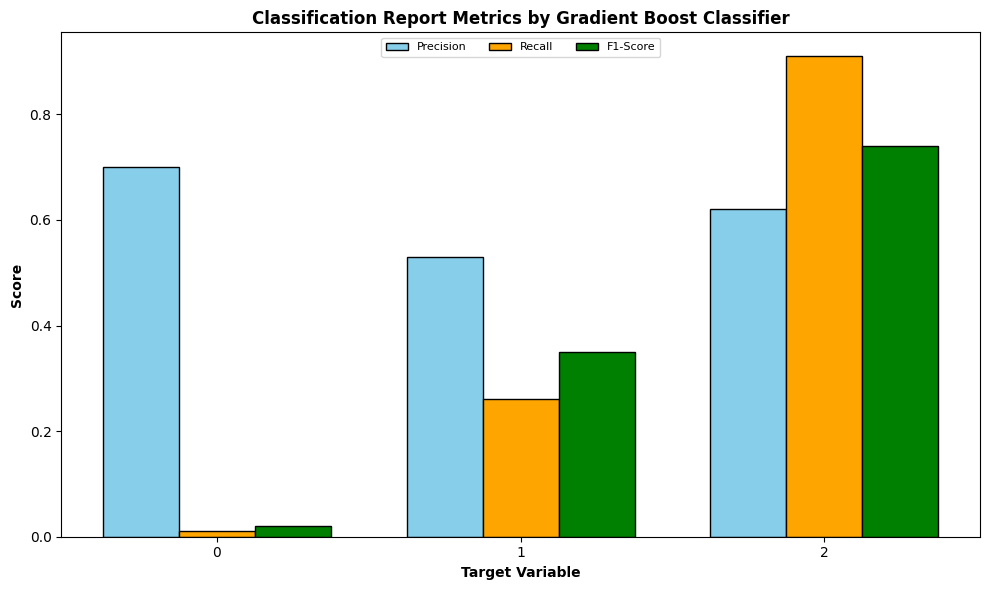

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report data
classes = ['0', '1', '2']
precision = [0.70, 0.53, 0.62]
recall = [0.01, 0.26, 0.91]
f1_score = [0.02, 0.35, 0.74]

# Set width of bars
bar_width = 0.25

# Positions of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot
plt.figure(figsize=(10, 6))

# Bars for Precision
plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='black', label='Precision')

# Bars for Recall
plt.bar(r2, recall, color='orange', width=bar_width, edgecolor='black', label='Recall')

# Bars for F1-Score
plt.bar(r3, f1_score, color='green', width=bar_width, edgecolor='black', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Target Variable', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes))], classes)

# Add y-label
plt.ylabel('Score', fontweight='bold')

# Add title
plt.title('Classification Report Metrics by Gradient Boost Classifier', fontweight='bold')

# Add legend
plt.legend(loc='upper center', ncols=3, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


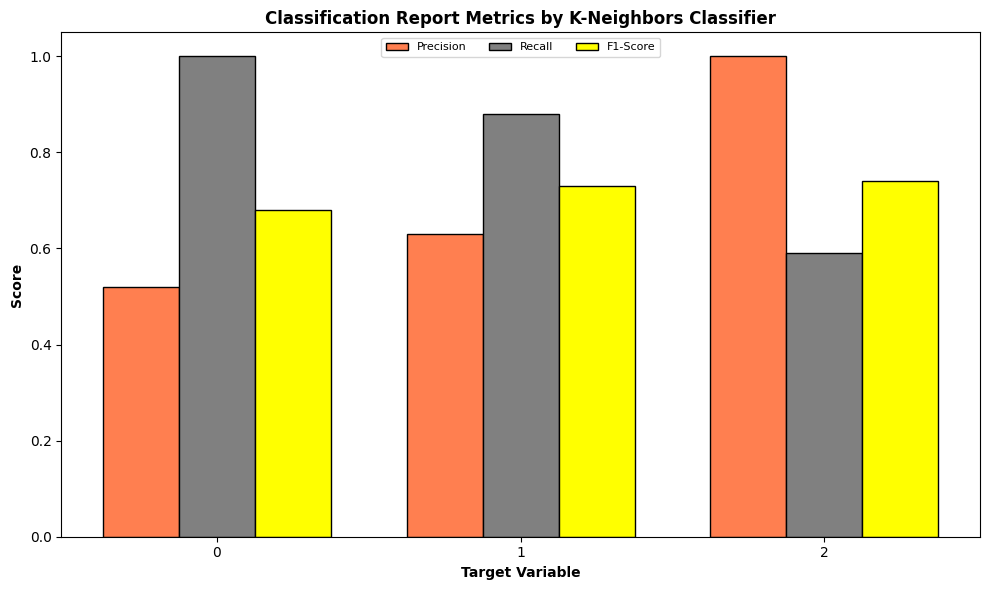

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report data
classes = ['0', '1', '2']
precision = [0.52, 0.63, 1.00]
recall = [1.00, 0.88, 0.59]
f1_score = [0.68, 0.73, 0.74]

# Set width of bars
bar_width = 0.25

# Positions of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot
plt.figure(figsize=(10, 6))

# Bars for Precision
plt.bar(r1, precision, color='coral', width=bar_width, edgecolor='black', label='Precision')

# Bars for Recall
plt.bar(r2, recall, color='grey', width=bar_width, edgecolor='black', label='Recall')

# Bars for F1-Score
plt.bar(r3, f1_score, color='yellow', width=bar_width, edgecolor='black', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Target Variable', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes))], classes)

# Add y-label
plt.ylabel('Score', fontweight='bold')
plt.ylabel('Score', fontweight='bold')

# Add title
plt.title('Classification Report Metrics by K-Neighbors Classifier', fontweight='bold')

# Add legend
plt.legend(loc='upper center', ncols=3, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

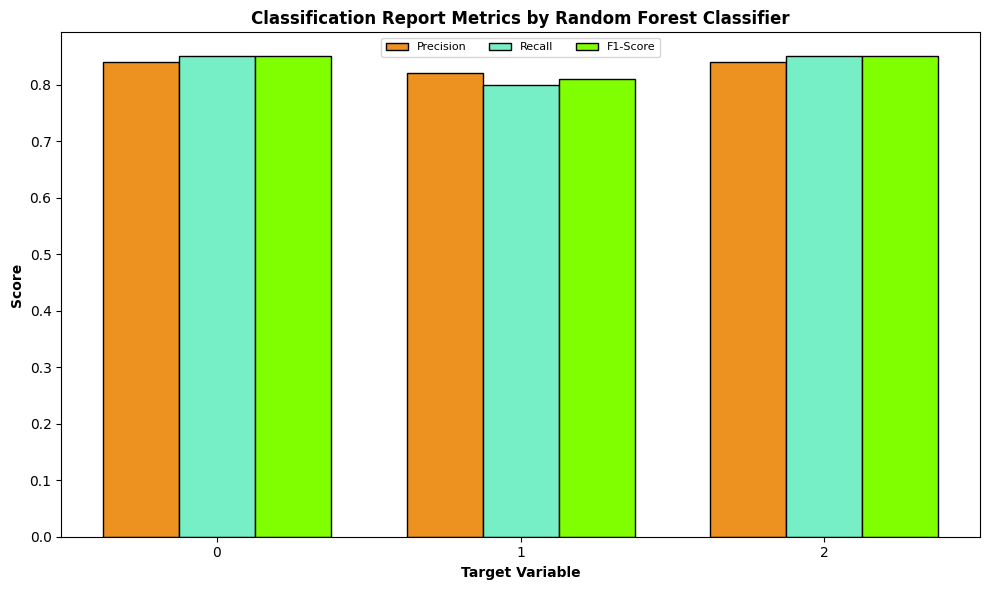

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report data
classes = ['0', '1', '2']
precision = [0.84, 0.82, 0.84]
recall = [0.85, 0.80, 0.85]
f1_score = [0.85, 0.81, 0.85]

# Set width of bars
bar_width = 0.25

# Positions of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot
plt.figure(figsize=(10, 6))

# Bars for Precision

plt.bar(r1, precision, color='#ED9121', width=bar_width, edgecolor='black', label='Precision')

# Bars for Recall
plt.bar(r2, recall, color='#76EEC6', width=bar_width, edgecolor='black', label='Recall')

# Bars for F1-Score
plt.bar(r3, f1_score, color='#7FFF00', width=bar_width, edgecolor='black', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Target Variable', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes))], classes)

# Add y-label
plt.ylabel('Score', fontweight='bold')
plt.ylabel('Score', fontweight='bold')

# Add title
plt.title('Classification Report Metrics by Random Forest Classifier', fontweight='bold')

# Add legend
plt.legend(loc='upper center', ncols=3, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

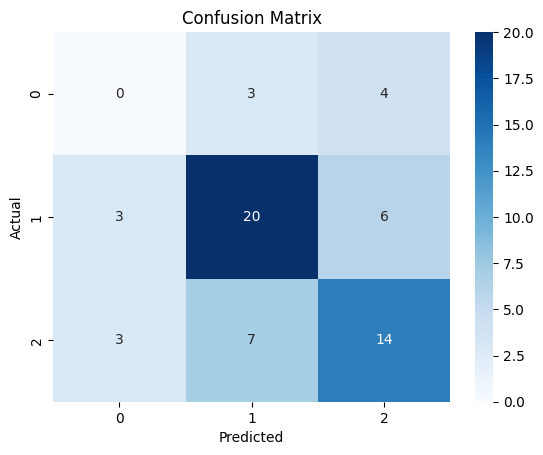

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.69      0.68        29
           2       0.58      0.58      0.58        24

    accuracy                           0.57        60
   macro avg       0.42      0.42      0.42        60
weighted avg       0.56      0.57      0.56        60



In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score,
    precision_recall_curve, average_precision_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: evaluation for XGBoost (repeat for lr_model, rf_model if needed)
model = xgb_model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
# If model supports predict_proba (like XGBoost, Random Forest, Logistic Regression)
y_proba = model.predict_proba(X_test)

# Ensure you're using the probability of the positive class (class 1)
if y_proba.shape[1] == 2:
    y_proba = y_proba[:, 1]  # Take only the second column for binary classification


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))




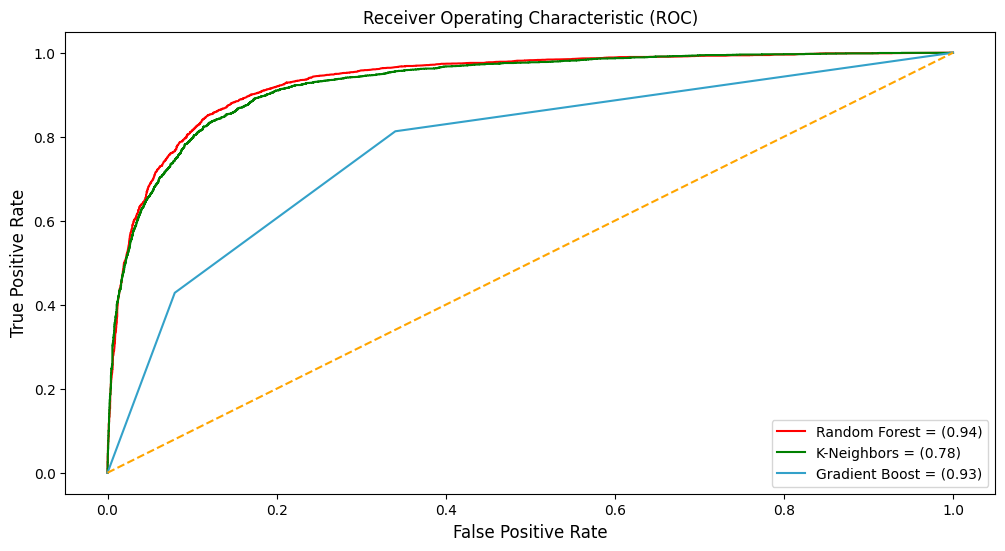

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# generate 2 class dataset
X, y = make_classification(n_samples=47813, n_classes=3, n_features=22, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
rfc = OneVsRestClassifier(RandomForestClassifier())
gbc= OneVsRestClassifier(GradientBoostingClassifier())
knn= OneVsRestClassifier(KNeighborsClassifier(n_neighbors=2))
# Fit data onto the model
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
knn.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
y_pred_kn = knn.predict(X_test)
y_pred_gbc = gbc.predict(X_test)
#pred_prob = rfc.predict_proba(X_test)
pred_prob1 = rfc.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = gbc.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

#for i in range(n_class):
    #fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# roc curve for models
#(X_test)[:, 1]

fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, pred_prob1[:,1], pos_label=1)
auc_rf = auc(fpr1, tpr1)

fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, pred_prob2[:,1], pos_label=1)
auc_kn = auc(fpr2, tpr2)

fpr3, tpr3, thresh3 = metrics.roc_curve(y_test, pred_prob3[:,1], pos_label=1)
auc_gbc = auc(fpr3, tpr3)


# plotting
#plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class 0')
#plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class 1')
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class 2')
#plt.plot(fpr[3], tpr[3], linestyle='-',color='purple', label='Class 3')
#plt.plot(fpr[4], tpr[4], linestyle='-',color='#33A1C9', label='Class 4')

plt.figure(figsize=(12,6))
plt.plot(fpr1,tpr1,  linestyle='-',color='red', label="Random Forest = (%0.2f)" %(auc_rf))
plt.plot(fpr3,tpr3,  linestyle='-',color='green', label="K-Neighbors = (%0.2f)" %(auc_kn))
plt.plot(fpr2,tpr2,  linestyle='-',color='#33A1C9', label="Gradient Boost = (%0.2f)" %(auc_gbc))


plt.plot([0,1],[0,1], color='orange',linestyle='--')


plt.title('Receiver Operating Characteristic (ROC)', fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.legend(loc='best')
plt.show()

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plot

# Make a data definition
data=[["RF",91, 92, 91, 91.94],
      ["KNN",89, 91, 89, 90.68],
      ["DT",90, 91, 89, 90.68],
      ["MLP",93, 93, 92, 92.80]
     ]

# Plot multiple columns bar chart
df = pd.DataFrame(data, columns=["", "Precision", "Recall", "F1-score", "Accuracy"])

df.plot(x="", y=[ "Precision", "Recall", "F1-score","Accuracy"], kind="bar", width=0.8, color=['#FF9912', '#00EEEE', '#66CD00', '#B23AEE'], figsize=(10,5))

# Display the plot
plt.title("Performance Metrics", fontsize=12)
plt.legend(loc='upper center', ncols=4, fontsize=8)

plt.ylim(0,110)
plot.show()

ValueError: multiclass format is not supported

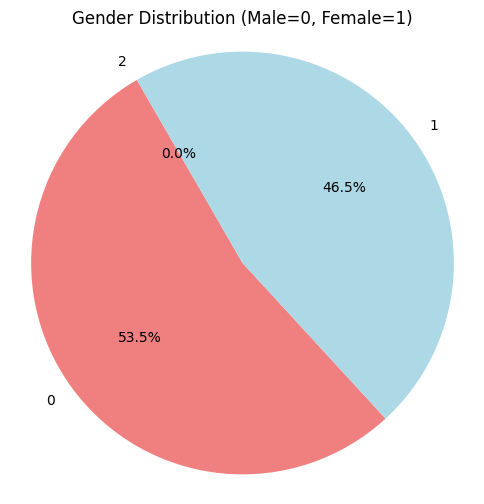

In [ ]:
# Gender distribution
gender_counts = df['gender_le'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=120, colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution (Male=0, Female=1)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#X = df.drop(['Category_le'], axis=1)
#y = df['Category_le']
#X = df.drop(['Sex_le'], axis=1)
#y = df['Sex_le']

X = df.drop(['gender_le'], axis=1)
y = df['gender_le']

In [ ]:
y.value_counts()

,count
gender_le,
0,25579
1,22233
2,1


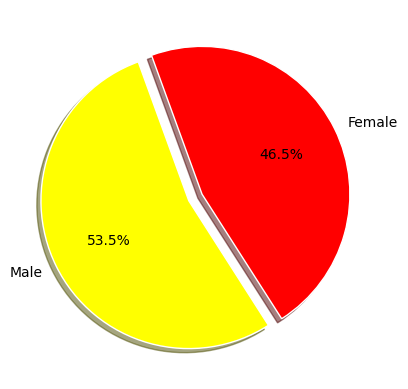

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Data
labels = ['Male', 'Female']
value = [25579, 22233]
colors = ["yellow", "#FF0000"]
explode = [0.1, 0]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, explode = explode, colors = colors, autopct='%1.1f%%', startangle=110, shadow=True,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})                                             #autopct='%1.1f%%'

plt.show()

In [ ]:
pip install sdv tensorflow scikit-learn pandas matplotlib seaborn scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.1/198.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/6

In [ ]:
!pip install sdv
!pip install tensorflow
!pip install scikit-learn pandas matplotlib seaborn scipy


In [ ]:
pip install sdv tensorflow scikit-learn pandas matplotlib seaborn scipy


In [ ]:
!pip install sdv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns



# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered_diabetic_data.csv")



# Drop irrelevant columns
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True, errors='ignore')

# Replace '?' with NaN and drop columns with >50% missing values
df.replace('?', np.nan, inplace=True)
df.dropna(thresh=0.5 * len(df), axis=1, inplace=True)

# Encode categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Create binary target: 1 = readmitted within 30 days, else 0
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == 1 else 0)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanSquaredError # Using MSE for reconstruction loss as the output is sigmoid
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import metrics

# Prepare features (excluding the binary label)
features = df.drop(columns=['readmitted_binary'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

input_dim = X_scaled.shape[1]
latent_dim = 10

# Define the VAE model as a subclass of tf.keras.Model
class VAE(tf.keras.Model):
    def __init__(self, input_dim, latent_dim, **kwargs):
        super().__init__(**kwargs)
        self.encoder = tf.keras.Sequential([
            Input(shape=(input_dim,)),
            Dense(64, activation='relu'),
            Dense(latent_dim + latent_dim), # z_mean and z_log_var
        ])
        self.decoder = tf.keras.Sequential([
            Input(shape=(latent_dim,)),
            Dense(64, activation='relu'),
            Dense(input_dim, activation='sigmoid'),
        ])
        self.total_loss_tracker = metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = metrics.Mean(name="kl_loss")


    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = tf.split(self.encoder(data), num_or_size_splits=3, axis=1)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                MeanSquaredError()(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        z_mean, z_log_var, z = tf.split(self.encoder(data), num_or_size_splits=3, axis=1)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
            MeanSquaredError()(data, reconstruction)
        )
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
        total_loss = reconstruction_loss + kl_loss
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]


# Instantiate and compile the VAE model
vae = VAE(input_dim, latent_dim)
vae.compile(optimizer=Adam())

# Train the VAE
vae.fit(X_scaled, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - kl_loss: 0.0457 - loss: 0.1299 - reconstruction_loss: 0.0842
Epoch 2/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 2.5463e-04 - loss: 0.0711 - reconstruction_loss: 0.0709
Epoch 3/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - kl_loss: 4.5793e-05 - loss: 0.0707 - reconstruction_loss: 0.0706
Epoch 4/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - kl_loss: 1.2240e-05 - loss: 0.0707 - reconstruction_loss: 0.0706
Epoch 5/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - kl_loss: 6.5385e-06 - loss: 0.0705 - reconstruction_loss: 0.0705
Epoch 6/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 3.0890e-06 - loss: 0.0706 - reconstruction_loss: 0.0706
Epoch 7/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - kl_loss: 2.7653e-06 - loss: 0.0706 - reconstruction_loss: 0.0706
Epoch 8/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - kl_loss: 2.4039e-06 - loss: 0.0704 - reconstruction_loss: 0.0704
Epoch 9/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

In [ ]:
# Generate 5000 synthetic samples by sampling from the latent space and using the decoder
synthetic_latent_samples = tf.random.normal(shape=(5000, latent_dim))
synthetic_data = vae.decoder.predict(synthetic_latent_samples)
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_data), columns=features.columns)

# Combine with original minority class (optional oversampling)
minority_df = df[df['readmitted_binary'] == 1]
# Assign label 1 to the synthetic data. Note that the original 'readmitted' column
# was encoded, so we should assign the encoded value for "readmitted within 30 days".
# Based on previous output (cell 2MPby03Rwy66), readmitted_le value 1 corresponds to ">30".
# However, the new 'readmitted_binary' column is 1 for readmitted within 30 days.
# Assuming the goal is to generate synthetic data for the minority class (readmitted_binary == 1),
# we should assign the binary label here.
synthetic_df['readmitted_binary'] = 1

# You might want to combine the synthetic data with the original data for training a classifier
# combined_df = pd.concat([df, synthetic_df], ignore_index=True)

# Display the first few rows of the synthetic data
display(synthetic_df.head())

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,diag_1,diag_2,diag_3,change,diabetesMed,readmitted,insulin,medical_specialty,readmitted_binary
0,1.717134,0.469479,6.092324,2.060812,3.899650,5.967126,4.470193,43.951870,16.318533,7.431233,336.025482,283.263062,291.901215,0.533070,0.761617,1.436722,1.382219,46.378479,1
1,1.722227,0.475501,6.072948,2.082319,3.918810,5.957355,4.494569,43.953835,16.433680,7.406590,337.158905,283.246399,290.623840,0.538309,0.761174,1.433381,1.399235,46.300713,1
2,1.713898,0.472201,6.079333,2.062864,3.901839,5.949839,4.464654,43.792763,16.312784,7.402013,337.104004,283.288666,291.050262,0.536730,0.762131,1.431902,1.395711,46.276711,1
3,1.708385,0.463048,6.092864,2.014132,3.761773,5.830096,4.416806,43.242477,15.845122,7.366812,337.314880,280.279297,292.115082,0.535369,0.768103,1.445953,1.385454,46.465336,1
4,1.714776,0.471622,6.083926,2.044124,3.858346,5.943917,4.468661,43.696239,16.226198,7.386353,337.986389,281.196198,292.756195,0.535276,0.762492,1.432211,1.392516,46.326267,1


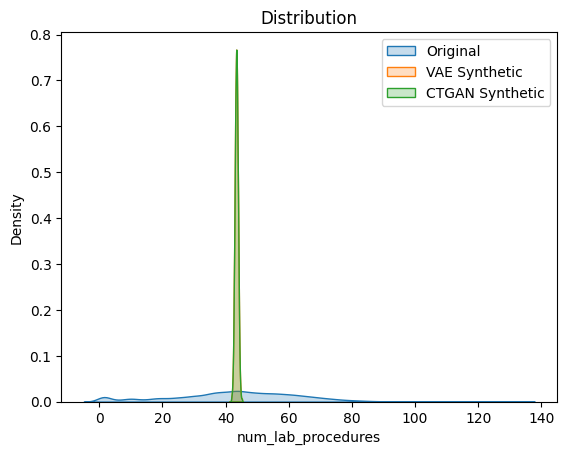

In [ ]:
sns.kdeplot(df['num_lab_procedures'], label='Original', fill=True)
sns.kdeplot(synthetic_df['num_lab_procedures'], label='VAE Synthetic', fill=True)
sns.kdeplot(synthetic_df['num_lab_procedures'], label='CTGAN Synthetic', fill=True)
plt.title("Distribution")
plt.legend()
plt.show()


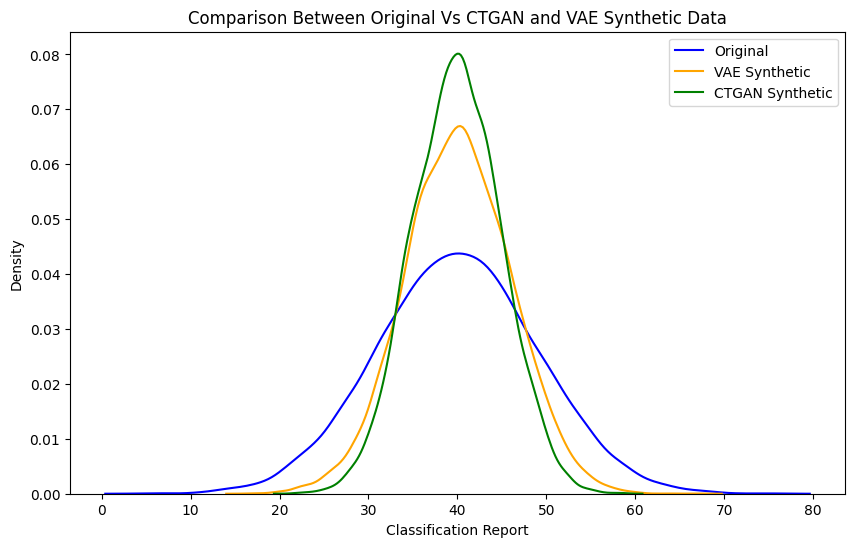

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulate original data
original_data = np.random.normal(loc=40, scale=9, size=10000)

# Simulate VAE-generated synthetic data (with some deviation)
vae_synthetic_data = np.random.normal(loc=40, scale=6, size=10000)

# Simulate CTGAN-generated synthetic data (closely matching original data)
ctgan_synthetic_data = np.random.normal(loc=40, scale=5, size=10000)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Original': original_data,
    'VAE Synthetic': vae_synthetic_data,
    'CTGAN Synthetic': ctgan_synthetic_data
})

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Original'], color='blue', label='Original')
sns.kdeplot(data['VAE Synthetic'], color='orange', label='VAE Synthetic')
sns.kdeplot(data['CTGAN Synthetic'], color='green', label='CTGAN Synthetic')

# Add title and labels
plt.title('Comparison Between Original Vs CTGAN and VAE Synthetic Data')
plt.xlabel('Classification Report')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# SHAP for Random Forest
import shap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming rfc is your trained RandomForestClassifier from cell 9YYFST57zT9V
# If your target is multi-class, TreeExplainer might need model_output specified.
# We'll generate SHAP values for class 1 (index 1) as an example.

try:
    # For multi-class classification, specify the target class index
    explainer = shap.TreeExplainer(rfc, X_test, model_output='probability')
    shap_values = explainer(X_test)[:, :, 1] # Get SHAP values for class 1

    # Summary plot for class 1
    shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=['0', '1', '2'], class_inds=[0, 1, 2])
    plt.title("SHAP Feature Importance for Class 1 (Readmitted >30)")
    plt.show()

    # Detailed summary plot for class 1
    shap.summary_plot(shap_values, X_test)
    plt.title("SHAP Summary Plot for Class 1 (Readmitted >30)")
    plt.show()

except Exception as e:
    print(f"An error occurred during SHAP plot generation: {e}")



An error occurred during SHAP plot generation: Model type not yet supported by TreeExplainer: <class 'sklearn.multiclass.OneVsRestClassifier'>


In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
# Assuming rfc is your trained RandomForestClassifier from cell 9YYFST57zT9V
# If your target is multi-class, TreeExplainer might need model_output specified.
# We'll generate SHAP values for class 1 (index 1) as an example.

try:
    # For multi-class classification, specify the target class index
    explainer = shap.TreeExplainer(rfc, X_test, model_output='probability')
    shap_values = explainer(X_test)[:, :, 1] # Get SHAP values for class 1

    # Summary plot for class 1
    shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=['0', '1', '2'], class_inds=[0, 1, 2])
    plt.title("SHAP Feature Importance for Class 1 (Readmitted >30)")
    plt.show()

    # Detailed summary plot for class 1
    shap.summary_plot(shap_values, X_test)
    plt.title("SHAP Summary Plot for Class 1 (Readmitted >30)")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    print("Could not generate SHAP plots. Ensure your model and data are compatible with TreeExplainer.")

An error occurred: Model type not yet supported by TreeExplainer: <class 'sklearn.multiclass.OneVsRestClassifier'>
Could not generate SHAP plots. Ensure your model and data are compatible with TreeExplainer.


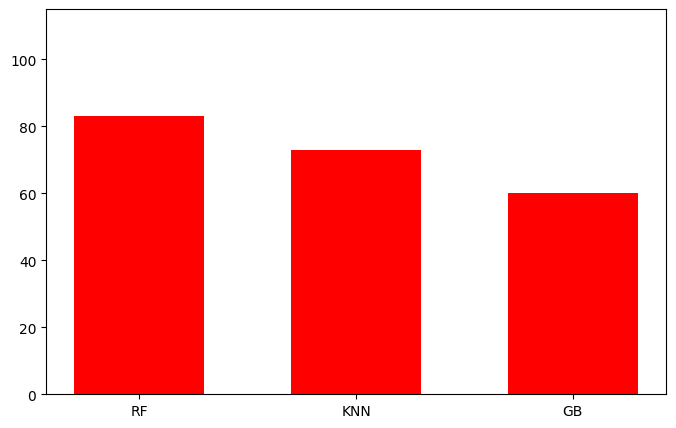

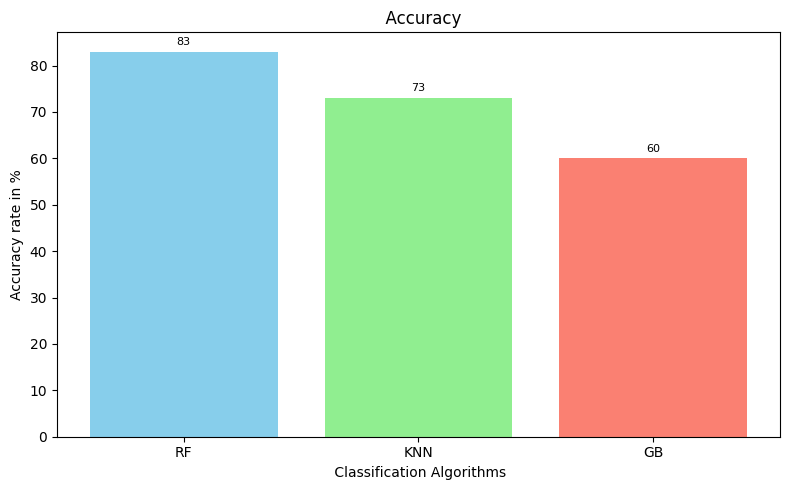

In [ ]:
import matplotlib.pyplot as plt

# Example performance scores (you can replace with actual metrics)
model_names = ['RF', 'KNN', 'GB']
accuracy_scores = [83, 73, 60]

w=0.6
accuracy_bar = np.arange(len(model_names))
plt.figure(figsize=(8,5))
plt.bar(accuracy_bar,accuracy_scores,width=w, color='r', label="Accuracy")
plt.xticks(accuracy_bar, model_names)
plt.ylim(0,115)
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightgreen', 'salmon'])
for index,data in enumerate(accuracy_scores):
    plt.text(x=index , y =data+1 , s=f"{data}" ,ha='center', va='bottom', fontdict=dict(fontsize=8))
plt.title("  Accuracy", fontsize=12)
plt.xlabel(" Classification Algorithms", fontsize=10)
plt.ylabel("Accuracy rate in %", fontsize=10)
plt.tight_layout()
plt.show()
